# Shadow Mean
Investigating the distribution of sample mean.

In [1]:
import numpy as np
import pandas as pd

### Functions

In [2]:
def pareto_sample_mean(a, size):
    """
    Calculate a sample mean from n=`size` pareto realisations.

    Parameters
    ----------
    a : float or array_like of floats
        Shape of the distribution. Must be positive.
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are drawn.  If size is ``None`` (default),
        a single value is returned if ``a`` is a scalar.  Otherwise,
        ``np.array(a).size`` samples are drawn.
    """
    s = np.random.pareto(a, n)
    mu = np.mean(s)
    
    return mu

# Analysis
I use the term `mu_mu_mean` to represent the mean of the sample means

In [3]:
# Settings
n = 100000
a = 1.13  # Supposedly this is pareto 80:20, but I'm not sure I've got this right

In [4]:
mu_samples = [pareto_sample_mean(a,n) for i in range(1,10000)]
mu_sr = pd.Series(mu_samples)
mu_sr.name = 'mean_of_mean'

### True Mean vs. Sample Mean

In [5]:
true_mean = a/(a-1)
mu_mu_mean = mu_sr.mean()

print(f'True mean: {true_mean:,.2f}')
print(f'Sample mean: {mu_mu_mean:,.2f}')

True mean: 8.69
Sample mean: 7.26


### Mean Evolution
Show how mean evolves as you increase the sample size

In [6]:
# Calculate the Cumulative Mean
cumcount = pd.Series(1).repeat(n).reset_index(drop=True).cumsum()
cummean = (mu_sr.cumsum()/cumcount)
cummean.name = 'cumulative_mean'

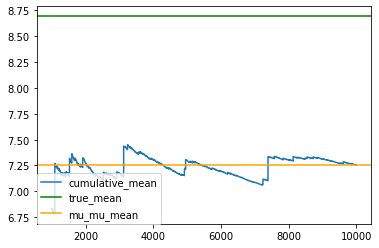

In [7]:
ax = cummean.iloc[1000:].plot() # Truncate the earlier values since they're too wild
ax.axhline(true_mean, color='green', label='true_mean')
ax.axhline(mu_mu_mean, color='orange', label='mu_mu_mean')
ax.legend(loc=[0,0])

### Estimate the distribution of the sample mean
Naive approach (as opposed to plug-in estimator approach)

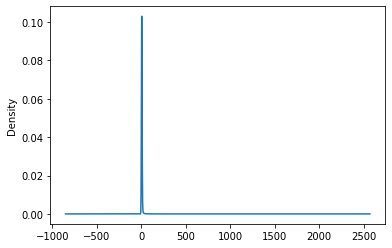

In [8]:
mu_sr.plot.density()

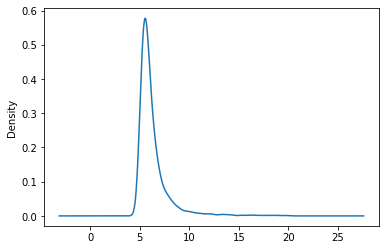

In [9]:
condition = (mu_sr>-0) & (mu_sr<20)
mu_sr.loc[condition].plot.density()

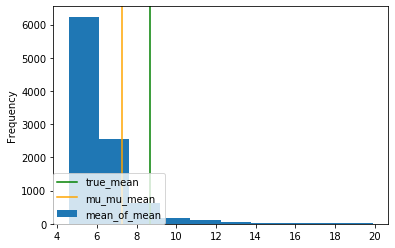

In [10]:
condition = (mu_sr>-0) & (mu_sr<20)
ax=mu_sr.loc[condition].plot(kind='hist')
ax.axvline(true_mean, color='green', label='true_mean')
ax.axvline(mu_mu_mean, color='orange', label='mu_mu_mean')
ax.legend(loc=[0,0])

# Conclusion

We see both from the plot that most sample means fall below the true mean. 